# University of Aberdeen

## Applied AI (CS5079)

### Resit CA1 - Reinforcement Learning with OpenAI Gym

In [1]:
#Library for environments
import gym
from gym.envs.registration import register
from gym.envs.toy_text.frozen_lake import generate_random_map

#Librairies to represent the output
from IPython.display import clear_output
import time
import matplotlib.pyplot as plt

#Essential libraries for computation
import numpy as np
import random
from setuptools import dist
import tensorflow.compat.v1 as tf
from collections import deque

We will use the following environment.

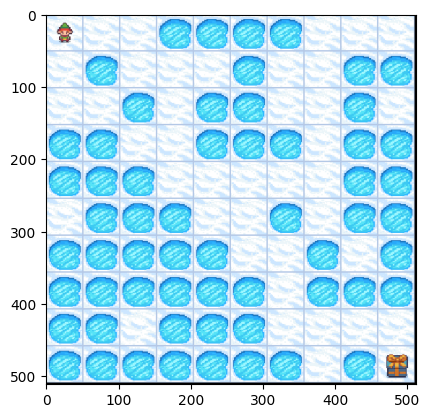

In [2]:
from IPython.display import display
random_map = generate_random_map(size=10, p=0.3)    
env = gym.make("FrozenLake-v1", desc=random_map, render_mode="rgb_array")
env.reset()
plt.imshow(env.render())
display(plt.gcf())
clear_output(wait=True)

In [3]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import Huber

In [4]:

class QLearningAgent:
    def __init__(self, env, exploration_probability=1, learning_rate=0.1, discount_factor=0.99,\
                  max_epsilon=1.0, min_epsilon=0.01, decay_rate=0.005):
        self.env = env
        self.exploration_probability = exploration_probability
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.space_size = env.observation_space.n
        self.action_size = env.action_space.n
        self.max_epsilon = max_epsilon            # Exploration probability at start
        self.min_epsilon = min_epsilon          # Minimum exploration probability
        self.decay_rate = decay_rate      # Exponential decay rate for exploration prob
        self.Q_table = np.zeros((self.space_size, self.action_size))
        self.rewards = []
        # ------------------------------------------------------------------------------------------------------
        # Open for interpretation
        self.model = Sequential([
            Dense(64, activation='relu', input_dim=self.space_size),
            Dense(64, activation='relu'),
            Dense(self.action_size, activation='linear')])
        self.model.compile(optimizer='Adam', loss=Huber())
        # ------------------------------------------------------------------------------------------------------

    def train(self, episodes=100):
        for episode in range(episodes):
            state = self.env.reset()[0]
            complete = False
            score = 0
            while not complete:
                # Take a random value between the range of 0-1, if it is less than our exploration rate probability then we take a random action
                trade_off = random.uniform(0, 1)
                if trade_off < self.exploration_probability:
                    action = self.env.action_space.sample()
                else:
                    # Selects action with the highest Q-value for the current state
                    action = np.argmax(self.Q_table[state, :])

                next_state, reward, done, _, _ = self.env.step(action)
                # Q(s,a)=(1−α)⋅Q(s,a)+α⋅(R+γ⋅maxa'Q(s',a'))
                self.Q_table[state, action] = self.Q_table[state, action] + self.learning_rate * (reward + self.discount_factor * np.max(self.Q_table[next_state, :]) - self.Q_table[state, action])

                score += reward
                state = next_state

                if done:
                    complete = True
                    print(f"Episode {episode + 1} Score {score}")
                    self.exploration_probability = self.min_epsilon + (self.max_epsilon - self.min_epsilon)*np.exp(-self.decay_rate*episode)
                    self.rewards.append(score)


In [5]:
env = gym.make("FrozenLake-v1", desc=random_map)
env.reset()
agent = QLearningAgent(env)

# Train the agent
agent.train(episodes=15000)
print(agent.Q_table)


# Close the environment
env.close()


c:\Users\kuba\OneDrive\Pulpit\studia\year 5\applied ai\assessment1\CS5079_AppliedAI\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\kuba\OneDrive\Pulpit\studia\year 5\applied ai\assessment1\CS5079_AppliedAI\.venv\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 1 Score 0.0
Episode 2 Score 0.0
Episode 3 Score 0.0
Episode 4 Score 0.0
Episode 5 Score 0.0
Episode 6 Score 0.0
Episode 7 Score 0.0
Episode 8 Score 0.0
Episode 9 Score 0.0
Episode 10 Score 0.0
Episode 11 Score 0.0
Episode 12 Score 0.0
Episode 13 Score 0.0
Episode 14 Score 0.0
Episode 15 Score 0.0
Episode 16 Score 0.0
Episode 17 Score 0.0
Episode 18 Score 0.0
Episode 19 Score 0.0
Episode 20 Score 0.0
Episode 21 Score 0.0
Episode 22 Score 0.0
Episode 23 Score 0.0
Episode 24 Score 0.0
Episode 25 Score 0.0
Episode 26 Score 0.0
Episode 27 Score 0.0
Episode 28 Score 0.0
Episode 29 Score 0.0
Episode 30 Score 0.0
Episode 31 Score 0.0
Episode 32 Score 0.0
Episode 33 Score 0.0
Episode 34 Score 0.0
Episode 35 Score 0.0
Episode 36 Score 0.0
Episode 37 Score 0.0
Episode 38 Score 0.0
Episode 39 Score 0.0
Episode 40 Score 0.0
Episode 41 Score 0.0
Episode 42 Score 0.0
Episode 43 Score 0.0
Episode 44 Score 0.0
Episode 45 Score 0.0
Episode 46 Score 0.0
Episode 47 Score 0.0
Episode 48 Score 0.0
E

In [6]:
max(agent.rewards)

0.0